# Vector Semantics – Part 1

# What is Vector semantic ?

Vector semantics represents a word in multi-dimensional vector space. Vector model is also called Embeddings, due to the fact that word is embedded in a particular vector space. Vector model offers many advantages in NLP. For example, in sentimental analysis, it sets up a boundary class and predicts if the sentiment is positive or negative (a binomial classification). Another key practical advantage with vector semantics is that it can learn automatically from text without complex labeling or supervision. As a result of these advantages, the vector semantics has become a de-facto standard for NLP applications such as Sentiment Analysis, Named Entity Recognition (NER), topic modeling, and so on.

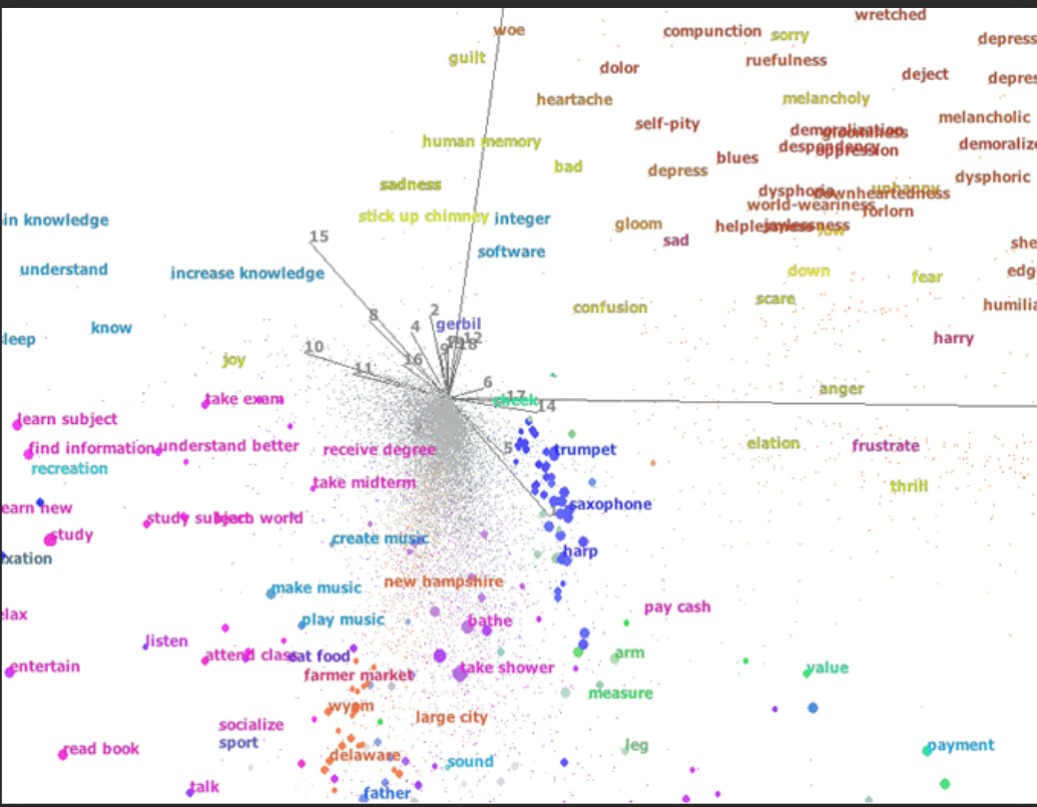

# What is Embedding?

Embeddings in NLP is a technique where individual words are represented as real-valued vectors in a lower-dimensional space and captures inter-word semantics.


In this notebook, We going to intreduce three techniques for embedding. These techniques will be used for a machine learning models such as SVM, Random forest, ... ect.

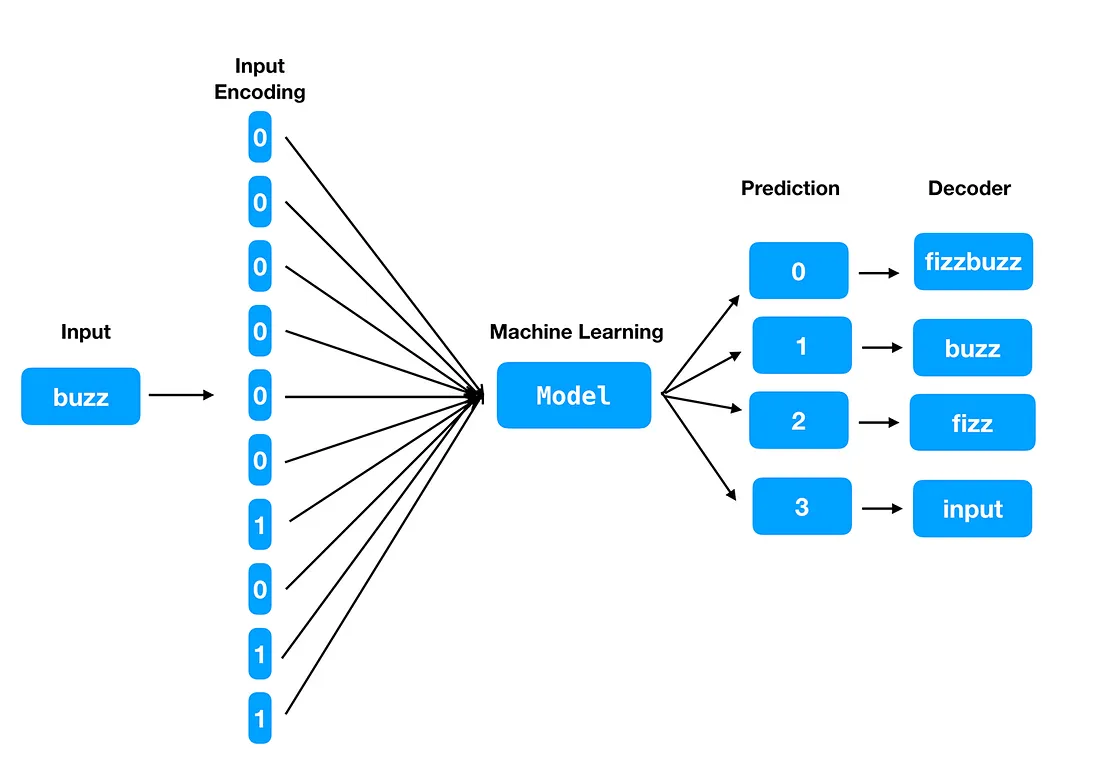

# 1- Term-Document Matrix

In natural language processing, we see many methods of representing text data. Term document matrix is also a method for representing the text data. In this method, the text data is represented in the form of a matrix. The rows of the matrix represent the sentences from the data which needs to be analyzed and the columns of the matrix represent the word. The dice under the matrix represent the number of occurrences of the words. Let’s understand it with an example.

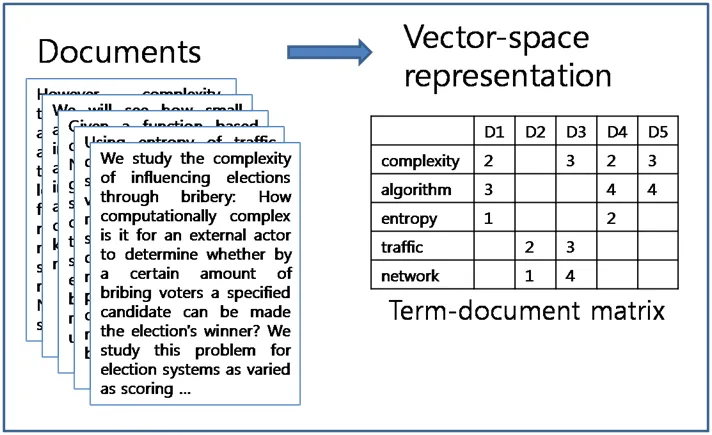

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

sentence1 = "I love football"
sentence2 = "Messi is a great football player"
sentence3 = "Messi has won seven Ballon d’Or awards "

docs = [sentence1, sentence2, sentence3]
print(docs)

['I love football', 'Messi is a great football player', 'Messi has won seven Ballon d’Or awards ']


In [2]:
 # Fit and transform the documents into numerical vectors
vec = CountVectorizer()
X = vec.fit_transform(docs)

In [3]:
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names_out())
df.head()

,awards,ballon,football,great,has,is,love,messi,or,player,seven,won
0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,1,1,0,1,0,1,0,1,0,0
2,1,1,0,0,1,0,0,1,1,0,1,1


^C


# 2- Cosine similarity

In NLP, Cosine similarity is a metric used to measure how similar the documents are irrespective of their size.

Let’s compute the Cosine similarity between two text document and observe how it works.

The common way to compute the Cosine similarity is to first we need to count the word occurrence in each document. To count the word occurrence in each document, we can use CountVectorizer or TfidfVectorizer functions that are provided by Scikit-Learn library.'[

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import *


In [6]:
# Sample text data (replace with your own documents)

doc_1 = "Data is the oil of the digital economy"
doc_2 = "Data is a new oil"

data = [doc_1, doc_2]

In [7]:
count_vectorizer = CountVectorizer() # Create a CountVectorizer instance
vector_matrix = count_vectorizer.fit_transform(data) # Fit and transform the documents into numerical vectors

In [8]:
# Get the feature names (words)
tokens = count_vectorizer.get_feature_names_out()
tokens

array(['data', 'digital', 'economy', 'is', 'new', 'of', 'oil', 'the'],
      dtype=object)

In [13]:
df = pd.DataFrame(data=vector_matrix.toarray(), index=data, columns=tokens)
df.head()

,data,digital,economy,is,new,of,oil,the
Data is the oil of the digital economy,1,1,1,1,0,1,1,2
Data is a new oil,1,0,0,1,1,0,1,0


In [15]:
# Calculate the cosine similarity between the documents
cosine_similarity_matrix = cosine_similarity(vector_matrix)
df_cosine = pd.DataFrame(data=cosine_similarity_matrix, index=data, columns=data)

In [16]:
# Print the cosine similarity matrix
df_cosine

,Data is the oil of the digital economy,Data is a new oil
Data is the oil of the digital economy,1.000000,0.474342
Data is a new oil,0.474342,1.000000


# 3- TF-IDF

TF-IDF stands for term frequency-inverse document frequency and it is a measure, used in the fields of information retrieval (IR) and machine learning, that can quantify the importance or relevance of string representations (words, phrases, lemmas, etc)  in a document amongst a collection of documents (also known as a corpus).

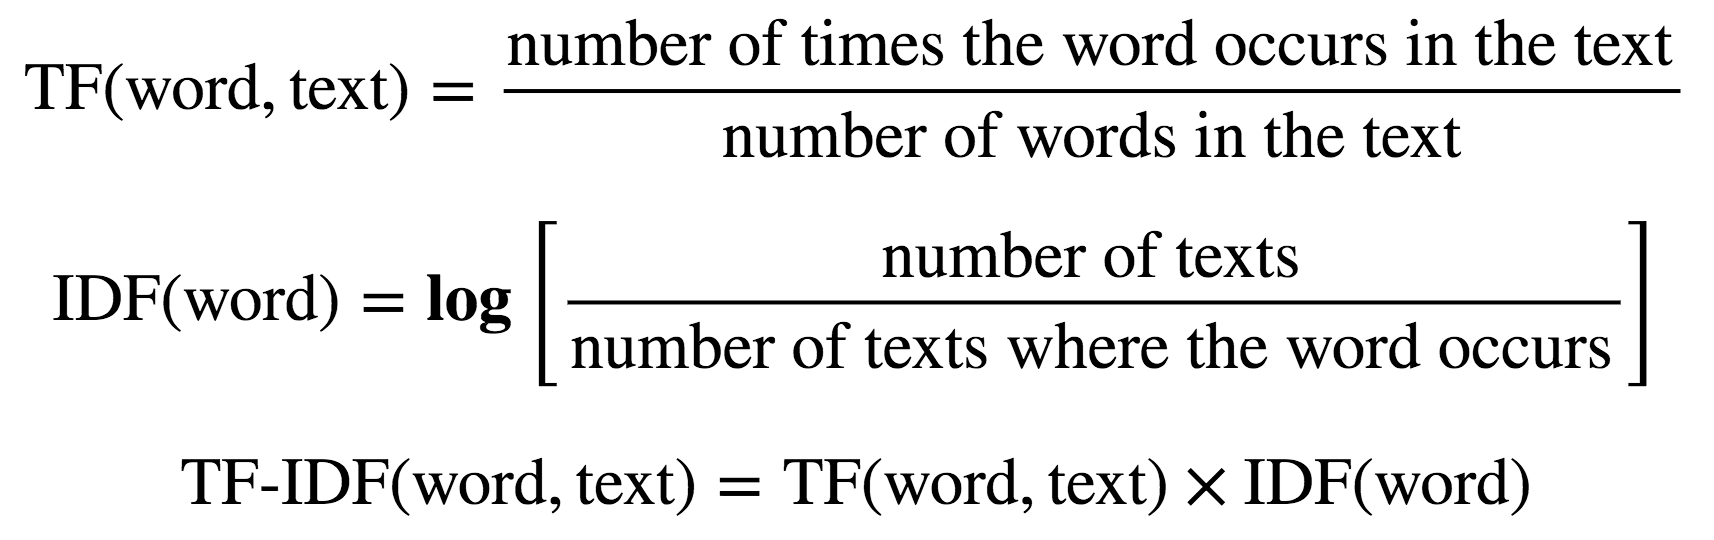

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
doc_1 = "Data is the oil of the digital economy"
doc_2 = "Data is a new oil"

data = [doc_1, doc_2]


In [21]:
tfidf = TfidfVectorizer()
result = tfidf.fit_transform(data)

In [22]:
df = pd.DataFrame(result.toarray(), columns=tfidf.get_feature_names_out())
df

,data,digital,economy,is,new,of,oil,the
0,0.243777,0.34262,0.34262,0.243777,0.000000,0.34262,0.243777,0.68524
1,0.448321,0.00000,0.00000,0.448321,0.630099,0.00000,0.448321,0.00000
